# Case description: Predicting and understanding viewer engagement with educational videos 

With the accelerating popularity of online educational experiences, the role of online lectures and other educational video continues to increase in scope and importance. Open access educational repositories such as <a href="http://videolectures.net/">videolectures.net</a>, as well as Massive Open Online Courses (MOOCs) on platforms like Coursera, have made access to many thousands of lectures and tutorials an accessible option for millions of people around the world. Yet this impressive volume of content has also led to a challenge in how to find, filter, and match these videos with learners. This assignment gives you an example of how machine learning can be used to address part of that challenge.

## About the prediction problem

One critical property of a video is engagement: how interesting or "engaging" it is for viewers, so that they decide to keep watching. Engagement is critical for learning, whether the instruction is coming from a video or any other source. There are many ways to define engagement with video, but one common approach is to estimate it by measuring how much of the video a user watches. If the video is not interesting and does not engage a viewer, they will typically abandon it quickly, e.g. only watch 5 or 10% of the total. 

A first step towards providing the best-matching educational content is to understand which features of educational material make it engaging for learners in general. This is where predictive modeling can be applied, via supervised machine learning. For this assignment, your task is to predict how engaging an educational video is likely to be for viewers, based on a set of features extracted from the video's transcript, audio track, hosting site, and other sources.

## About the dataset

The training and test datasets of educational video features are from the VLE Dataset put together by researcher Sahan Bulathwela at University College London. 

Each row in these two files corresponds to a single educational video, and includes information about diverse properties of the video content as described further below. The target variable is `engagement` which was defined as True if the median percentage of the video watched across all viewers was at least 30%, and False otherwise.

**File descriptions** 
    assets/train.csv - the training set
    assets/test.csv - the test set
<br>

**Data fields**

train.csv & test.csv:

    title_word_count - the number of words in the title of the video.
    
    document_entropy - a score indicating how varied the topics are covered in the video, based on the transcript. Videos with smaller entropy scores will tend to be more cohesive and more focused on a single topic.
    
    freshness - The number of days elapsed between 01/01/1970 and the lecture published date. Videos that are more recent will have higher freshness values.
    
    easiness - A text difficulty measure applied to the transcript. A lower score indicates more complex language used by the presenter.
    
    fraction_stopword_presence - A stopword is a very common word like 'the' or 'and'. This feature computes the fraction of all words that are stopwords in the video lecture transcript.
    
    speaker_speed - The average speaking rate in words per minute of the presenter in the video.
    
    silent_period_rate - The fraction of time in the lecture video that is silence (no speaking).
    
train.csv only:
    
    engagement - Target label for training. True if learners watched a substantial portion of the video (see description), or False otherwise.
    

## Objetive

The objective is to develop a classifier that achieves an AUC (Area Under the ROC Curve) of at least 0.8.

In [15]:
import warnings
warnings.filterwarnings("ignore")

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)   # Do not change this value: required to be compatible with solutions generated by the autograder.

GaussianNB AUC: 0.8212
RandomForest AUC: 0.8840
GradientBoosting AUC: 0.8697


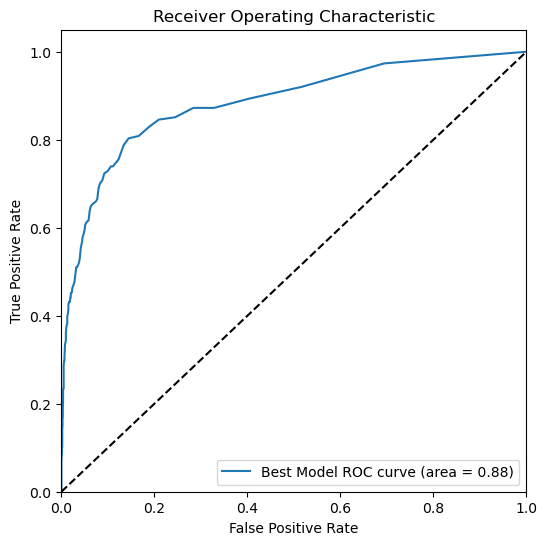

id
9240    0.01
9241    0.04
9242    0.02
9243    0.91
9244    0.00
Name: engagement, dtype: float64


In [17]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

def engagement_model():
    # Características más importantes
    most_importance = ['document_entropy', 'freshness', 'easiness',
                       'fraction_stopword_presence', 'silent_period_rate']

    # Cargar los datos desde archivos CSV
    train_data = pd.read_csv('./assets/train.csv')
    test_data = pd.read_csv('./assets/test.csv')

    # Seleccionar las características más importantes
    X_train = train_data[most_importance]
    y_train = train_data['engagement'].astype(int)

    X_test = test_data[most_importance]

    # Modelos a comparar
    models = {
        "GaussianNB": GaussianNB(),
        "RandomForest": RandomForestClassifier(random_state=0),
        "GradientBoosting": GradientBoostingClassifier(random_state=0)
    }

    # Dividir el conjunto de entrenamiento para validación
    X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

    best_model = None
    best_auc = 0

    for name, model in models.items():
        model.fit(X_train_split, y_train_split)
        y_val_pred = model.predict_proba(X_val_split)[:, 1]
        auc_score = roc_auc_score(y_val_split, y_val_pred)
        print(f"{name} AUC: {auc_score:.4f}")

        if auc_score > best_auc:
            best_auc = auc_score
            best_model = model

    # Graficar ROC para el mejor modelo
    y_val_pred = best_model.predict_proba(X_val_split)[:, 1]
    fpr, tpr, _ = roc_curve(y_val_split, y_val_pred)
    plt.figure(figsize=(6, 6))
    plt.plot(fpr, tpr, label=f'Best Model ROC curve (area = {best_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

    # Predecir las probabilidades de engagement en el conjunto de prueba usando el mejor modelo
    y_probabilities = best_model.predict_proba(X_test)[:, 1]

    # Crear un pd.Series con las probabilidades, usando el campo 'id' como índice
    result_series = pd.Series(y_probabilities, index=test_data['id'], name='engagement')

    return result_series

# Llamar a la función engagement_model y obtener el resultado
result = engagement_model()

# Verificar el resultado
print(result.head())